## POLSCI 3 Summer 2022

## Week 7 Lecture Notebook: Hypothesis Testing

In this notebook we will learn how to evaluate hypotheses using R. We begin with tabular analysis (2 categorical variables), proceed to difference in means (1 categorical variable, 1 continuous variable), and end with the correlation coefficient (2 continuous variables).

### Tabular Analysis  
In the following example, we will explore how to determine if there is a relationship between two categorical variables. We start with the example from our textbook, on the relationship between gender and vote choice in the 2016 US presidential election. The table below contains a sample of 2440 voters who were asked their gender and vote choice in the election. Cell values are the number of respondents in the corresponding category. (See also the textbook, p. 170.) *Note that this table excludes the row and column totals. You do not need to understand how to create a table like this*.

In [2]:
respond_table <- as.table(cbind(c(532, 596),c (737, 575)))
dimnames(respond_table) <- list(candidate = c("Clinton","Trump"),
                                gender = c("Male","Female")
                                )
respond_table

         gender
candidate Male Female
  Clinton  532    737
  Trump    596    575

In the introductory lecture on tabular analysis we actually went through all the intermediate steps to determine whether there was a relationship:

1. We computed the expected values of each cell under the null hypothesis.
2. For the table we computed $$ \chi^2 = \sum \frac{(Observed-Expected)^2}{Expected}$$

3. We compared the computed value of $\chi^2$ to the corresponding critical value to assess
   whether we can reject the null hypothesis of no relationship.

The nice thing about working in R is that R performs does all these computations for us in one command:

In [3]:
chisq.test(respond_table)


	Pearson's Chi-squared test with Yates' continuity correction

data:  respond_table
X-squared = 19.371, df = 1, p-value = 1.076e-05


Note the output of the `chisq.test` command gives not just the value of $\chi^2$ but the degrees of freedom (df) and the p-value too. 

Recall that **a _p_-value is the probability of seeing an estimate as large or larger than the estimate we saw _if there was no relationship in the population_**. Note above that the p-value is super small, on the order of .00001

Another way of thinking about what a _p_-value tells us: if we drew repeated random samples and computed the $\chi^2$ for each one, what proportion of the time would we get an estimate this large if there were no relationship in the population (the null hypothesis)? In our example above it would be 1 in 100,000. 

**Social scientists have arbitrarily decided to denote all estimates with *p*-values below 0.05 statistically significant**. That means we have arbitrarily decided that, if there is a 1 in 20 chance or less that we would get the sample estimate we did if there were not relationship in the population, we decide to conclude for the sake of scientific discussions that there is a relationship in the population. (For reference, in physics they require _p_-values of 1 in 3.5 million.)

## Difference of Means

When we have a continuous variable categorized by a categorical variable, we can use a *difference of means* test to determine if there is a relationship between the categorical variable and the continuous variable. For example, we would use a difference of means test to determine if there was a relationship between ice cream flavor (a categorical variable) and sales revenue (a continuous variable). 

In the example below, we follow the textbook (pp. 173-178) and analyze whether there is a significant difference in duration of governance between majority and minority governments. Our ex ante expectation is that majority governments last longer than minority governments. 

First let's load in the data:

In [4]:
govts<-read.csv('govts.csv')

Here is the codebook that describes the variables:

`nation`: the name of the country

`govtdate`: the date the government takes power

`govttime`: the amount of time in days the government is in control

`mingov`: a binary categorical variable where 1 signifies a minority government and 0 a majority government

In [6]:
head(govts)

,nation,govtdate,govttime,mingov
,<chr>,<int>,<dbl>,<dbl>
1,Italy,530717,31,1
2,Denmark,500915,42,1
3,Belgium,740425,48,1
4,Belgium,500630,49,0
5,Iceland,710614,117,0
6,Belgium,580626,134,1


We need to plot the distributions of <code>govttime</code> for minority and majority governments. 
Let's start by creating two subsets, one for minority governments and one for majority governments. 

In [7]:
min<-subset(govts,mingov==1)
maj<-subset(govts,mingov==0)

Now let's plot the densities of <code>govttime</code> for each type of government. (Compare to Figure 8.2 in the textbook.)

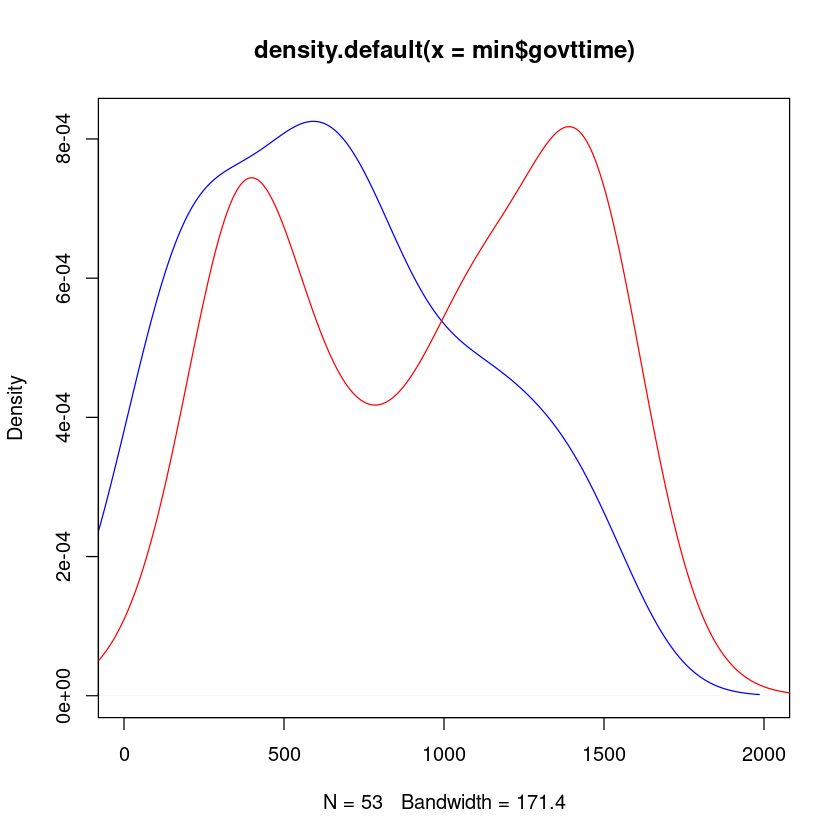

In [8]:
plot(density(min$govttime), col = "blue", xlim = c(0, 2000))
lines(density(maj$govttime), col = "red")

Are the mean durations for majority and minority governments sufficiently different from one another to justify rejecting the null hypothesis of no difference? In the difference of means lecture we computed the standard errors, t-statistic, and degrees of freedom by hand. The advantage of R is that R has a built in function for a difference of means test:

In [9]:
t.test(maj$govttime, min$govttime)


	Welch Two Sample t-test

data:  maj$govttime and min$govttime
t = 3.5859, df = 108.12, p-value = 0.0005058
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 114.5565 397.7265
sample estimates:
mean of x mean of y 
 930.5000  674.3585 


Recall that a t-statistic is the ratio of the estimate (sanple difference in means) to the standard error:

$t = \frac{\text{Estimate}}{\text{Standard Error}}$

**The _t_-statistic is a way to measure how likely it is that an estimate of the size we saw would arise by chance even if in the population there was no difference in means.** The larger the t-value, the smaller the p-value. 

By convention, **we call an estimate _statistically significant_ if the _t_-statistic is larger than 1.96 (either lower than -1.96 or larger than 1.96).** Smaller than that (closer to zero), and we generally conclude that our estimate could have arisen by chance (and we do not reject the null hypothesis).

## Pearson's r: Continuous Variables
When both variables are continuous, we want to measure their *correlation*: the degree to which one of the variable's change in value coincides with a similar change in value in the other variable. In the following example, we return to our earlier dataset on elections and explore the correlation between GDP and incumbent vote share. We expect this correlation to be positive. That is, as GDP growth increases, we expect incumbent vote share to increase also.  

In [10]:
elections <- read.csv('FairFPSR3.csv')
head(elections)

,inc_vote,year,inflation,goodnews,growth
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,48.516,1876,NA,NA,5.110
2,50.220,1880,1.974,9,3.879
3,49.846,1884,1.055,2,1.589
4,50.414,1888,0.604,3,-5.553
5,48.268,1892,2.274,7,2.763
6,47.760,1896,3.410,6,-10.024


Here is the codebook:

`inc_vote`: % of major party presidential vote won by incumbent party

`year`: Year of the presidential election

`inflation`: Inflation rate

`goodnews`: Number of quarters in the first 15 quarters of admin in which econ growth>3.2%

`growth`: % change in real GDP per capita

When computing correlations it is always a good idea to visualize the variables you are correlating by graphing them. (See also Figure 8.3 in the textbook.)

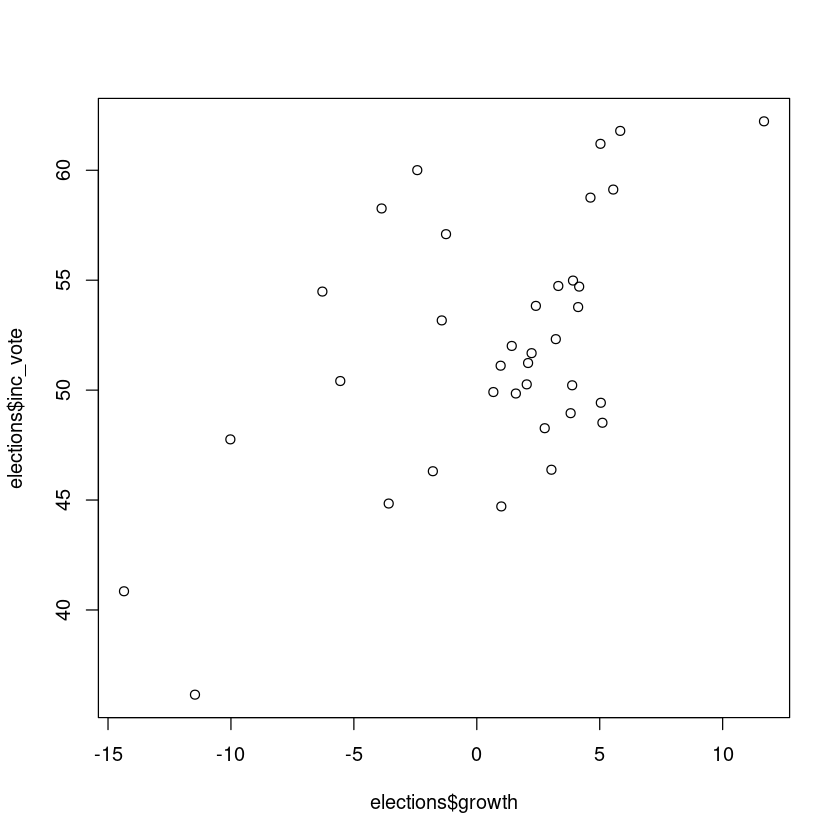

In [11]:
plot(elections$growth,elections$inc_vote)   # First variable is X axis, second variable is Y axis

Is the relationship positive? negative? Or is there no relationship between the variables?

To calculate the population correlation coefficient in R, we use `cor.test(X,Y)` where X and Y are 
variables. Below, we calculate the correlation coefficient for growth and incumbent vote share:

In [12]:
cor.test(elections$growth,elections$inc_vote)


	Pearson's product-moment correlation

data:  elections$growth and elections$inc_vote
t = 4.0319, df = 34, p-value = 0.0002955
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2954061 0.7560163
sample estimates:
      cor 
0.5687443 


Given the above output, what can we conclude about the relationsip between GDP growth and incumbent vote share?

## Interactive Visual 
The code in the following cell generates a distribution based on its correlation with the random uniform distirubtion x. This is meant to visualize what the effect of increasing or decreasing the correlation has on the visual relationship between variables. YOU DO NOT NEED TO UNDERSTAND HOW THIS CELL WORKS.

<center>
    <h1>
        <a href="https://datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fds-modules%2Fpolisci-3&branch=main&urlpath=shiny%2Fpolisci-3%2FModule_7_Hypothesis_Testing%2F">
        Link to interactive version of the cell below
        </a>
    </h1>
</center>

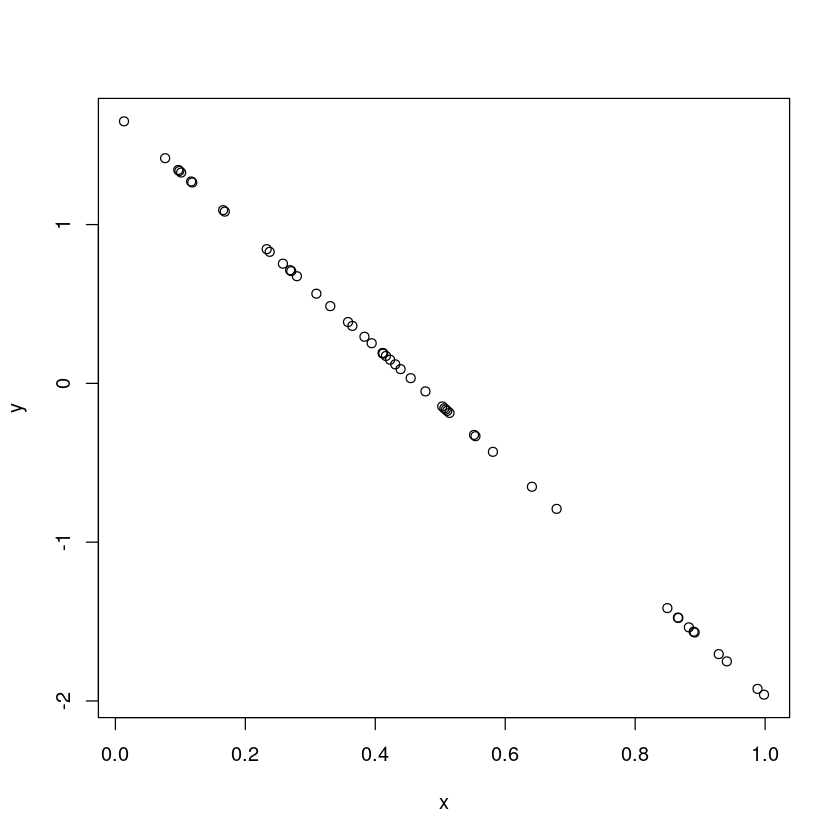

In [16]:
x=runif(n=50, min=0, max=1)
simcor = function (x, correlation) { 
    n = length(x)
    ymean = 0
    ysd = 1
    y = rnorm(n) 
    z = correlation * scale(x)[,1] + sqrt(1 - correlation^2) * scale(resid(lm(y ~ x)))[,1] 
    yresult = ymean + ysd * z 
    yresult }
y=simcor(x,-1)                                 # Try changing the 0.5 to something else between -1 and 1 
                                               # and reexecuting cell
plot(x,y)

#### Reminder about Peer Consulting Office Hours

If you had trouble with any content in this notebook, Data Peer Consultants are here to help! You 
can view their locations and availabilites at this link: https://data.berkeley.edu/degrees/peer-advising.
Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook,
applications of data science in the world or other data science courses offered at Berkeley -- 
make sure to take advantage of this wonderful resource!